## Trying to implement evolution with parametrization
The goal is to compute magnetization of the Heisemberg model with 2 spins using a parametrized circuit.

In [106]:
from qiskit import QuantumCircuit, BasicAer, transpile
from qiskit.circuit import Parameter
from numpy import linspace, pi, zeros_like
from matplotlib.pyplot import plot, legend, xlabel, show
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

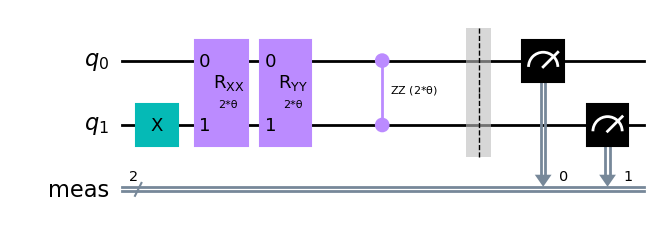

In [112]:
# Creating the parametrized circuit
theta = Parameter('θ')
spins = 2
circuit = QuantumCircuit(2)
circuit.x(1)
circuit.rxx(2 * theta, 0, 1)
circuit.ryy(2 * theta, 0, 1)
circuit.rzz(2 * theta, 0, 1)
circuit.measure_all()
circuit.draw('mpl')

### Binding parameters to values
All circuit parameters must be bound before sending the circuit to a backend. 

The `bind_parameters` method accepts a dictionary mapping `Parameter`s to values, and returns a new circuit with each parameter replaced by its corresponding value. Partial binding is supported, in which case the returned circuit will be parameterized by any `Parameter`s that were not mapped to a value.

In [108]:
times = linspace(0, 0.5 * pi, 100)
shots = 1000
circuits = [circuit.bind_parameters({theta: time}) for time in times]

In [113]:
# Transpiling and simulating
backend = BasicAer.get_backend('qasm_simulator')
job = backend.run(transpile(circuits, backend), shots = shots)
counts = job.result().get_counts()

In [110]:
%%time
za, zb = zeros_like(times), zeros_like(times)

for i, count in enumerate(counts):
    a = b = count.get('00', 0) - count.get('11', 0)
    a += count.get('10', 0) - count.get('01', 0)
    b -= count.get('10', 0) - count.get('01', 0)
    za[i] = a / shots / 2
    zb[i] = b / shots / 2

CPU times: user 296 µs, sys: 57 µs, total: 353 µs
Wall time: 332 µs


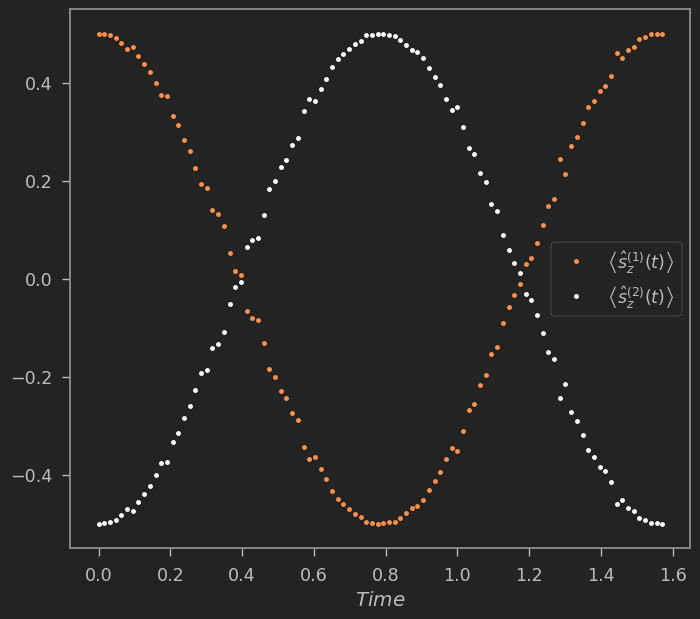

In [104]:
plot(times, za, 'y.')
plot(times, zb, 'w.')
legend([r'$\left\langle\hat{s}^{(1)}_z(t)\right\rangle$',
        r'$\left\langle\hat{s}^{(2)}_z(t)\right\rangle$'])
xlabel(r'$Time$')
show()